## Import danych i niezbędnych paczek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
data = pd.read_csv("bank-additional-full.csv", ";")
plt.style.use("dark_background")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Skopiowane ze strony z danymi:
###### https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset?resource=download
# bank client data:
*1 - age (numeric)

*2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

*3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

*4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone")
*9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

*10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

*11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
*12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*14 - previous: number of contacts performed before this campaign and for this client (numeric)

1515 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

# social and economic context attributes
*16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

*17 - cons.price.idx: consumer price index - monthly indicator (numeric)

*18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

*19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [5]:
categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", 
               "day_of_week", "poutcome", "y"]
numerical = ["age","duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.conf.idx", "euribor3m"]

In [6]:
data_num = data[numerical]
data_cat = data[categorical]

## Zmienna do przewidzenia (zależna): y
### Czy klient wpłaci pięniądze na lokate?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Nie widać żadnych nulli

In [8]:
for i in data_num.columns:
    column = data_num[i]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Liczba zer w kolumnie ', i, ' wynosi: ', count)

Liczba zer w kolumnie  age  wynosi:  0
Liczba zer w kolumnie  duration  wynosi:  4
Liczba zer w kolumnie  campaign  wynosi:  0
Liczba zer w kolumnie  pdays  wynosi:  15
Liczba zer w kolumnie  previous  wynosi:  35563
Liczba zer w kolumnie  emp.var.rate  wynosi:  0
Liczba zer w kolumnie  cons.conf.idx  wynosi:  0
Liczba zer w kolumnie  euribor3m  wynosi:  0


In [9]:
for i in data_num.columns:
    column = data_num[i]
    # Get the count of Zeros in column 
    count = (column < 0).sum()
    print('Liczba wartości ujemnych w kolumnie ', i, ' wynosi: ', count)

Liczba wartości ujemnych w kolumnie  age  wynosi:  0
Liczba wartości ujemnych w kolumnie  duration  wynosi:  0
Liczba wartości ujemnych w kolumnie  campaign  wynosi:  0
Liczba wartości ujemnych w kolumnie  pdays  wynosi:  0
Liczba wartości ujemnych w kolumnie  previous  wynosi:  0
Liczba wartości ujemnych w kolumnie  emp.var.rate  wynosi:  17191
Liczba wartości ujemnych w kolumnie  cons.conf.idx  wynosi:  41188
Liczba wartości ujemnych w kolumnie  euribor3m  wynosi:  0


### -  Zerowe previous może oznaczać, że ktoś jest "nowym klientem", możnaby było to skategoryzować
### - Zerowe pdays z definicji nie sugeruje czegoś brakującego
### -  Zerowe duration nie mówi nam czy ktoś podczas rozmowy się od razu rozłączył, czy w ogóle nie rozmawiał przez telefon z bankiem, więc osoby z wyzerowanym duration są dużą niewiadomą

In [10]:
data.isna().sum().sum()

0

In [11]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Rozkładny zmiennych numerycznych

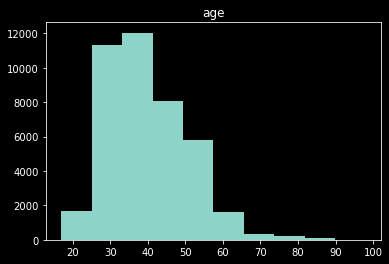

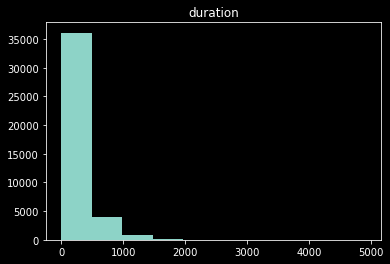

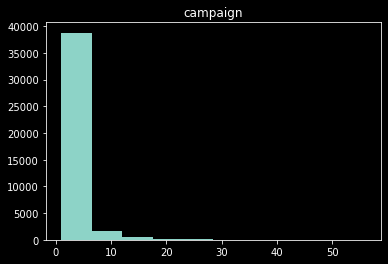

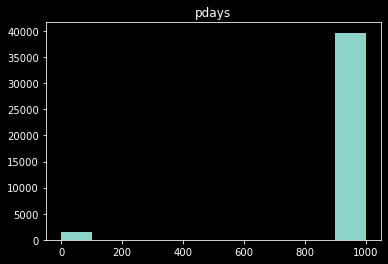

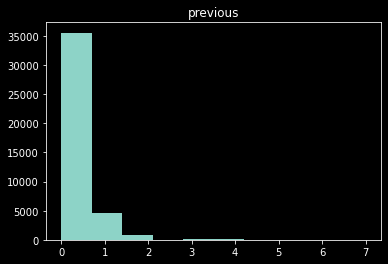

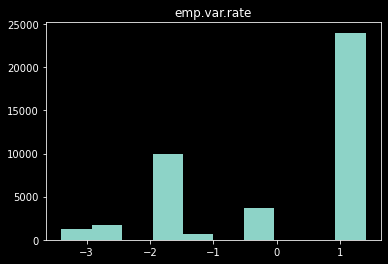

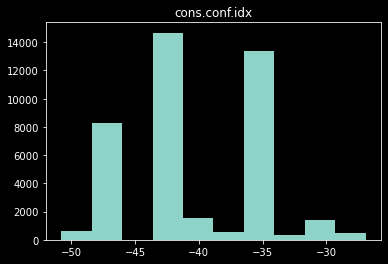

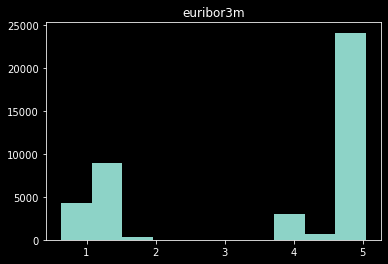

In [12]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

## Wnioski:
-  ["**age**", "**duration**", "**campaign**", "**previous**"] wyglądają jak rozkłady wykładnicze (więc być może można je zlinearyzować logarytmem w przyszłości przy tworzeniu modelu) <br><br>
-  **"pdays"** wygląda bardziej jak zmienna kategoryczna (czy kontaktowano się wcześniej z klientem) <br><br>
-reszta wygląda jakby dało się je skategoryzować (z racji "dziur" pomiędzy często występującymi wartościami)

## Korelacje między zmiennymi numerycznymi

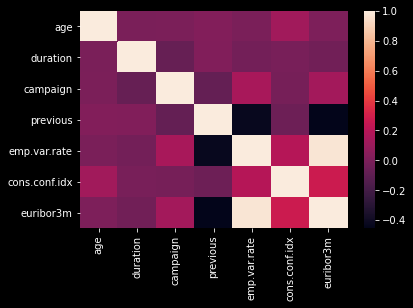

In [13]:
with plt.style.context('dark_background'):
    #Wywalamy pdays, ze względu na to, że jest "prawie" jak kategoryczna
    sns.heatmap(data_num.drop(["pdays"], axis=1).corr())

### Zmienne są słabo skorelowane (oprócz **emp.var.rate** i **euribor3m**, czego nie rozumiem)

# "Rozkłady" zmiennych dyskretnych

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


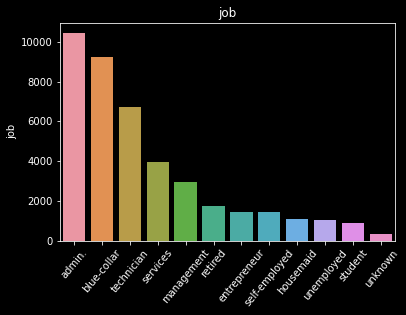

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


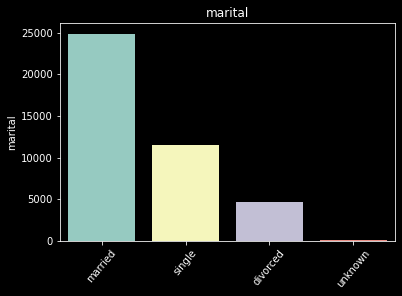

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


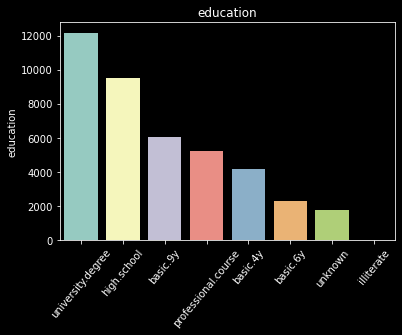

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


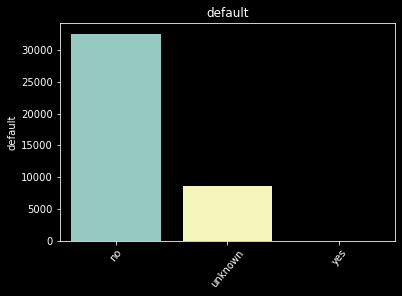

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


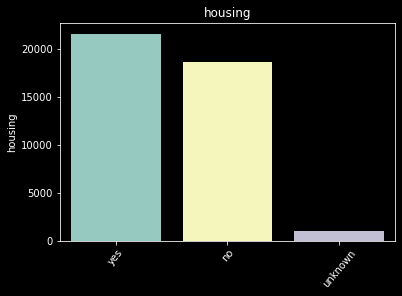

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


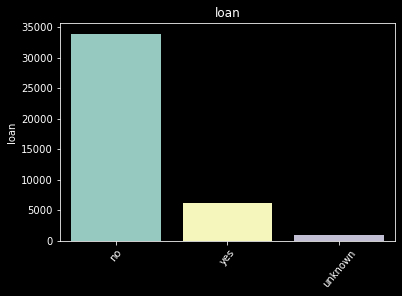

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


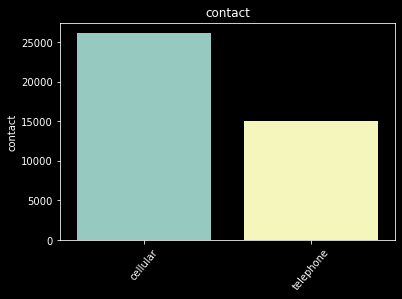

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


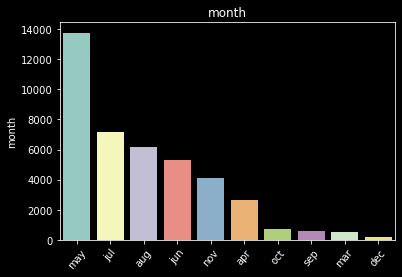

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


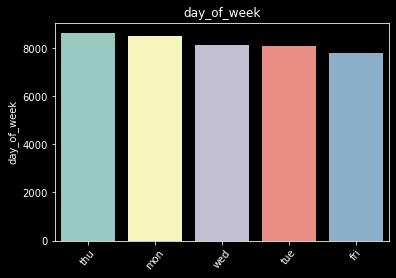

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


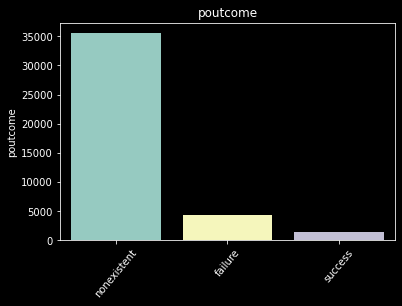

C:\Users\macie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


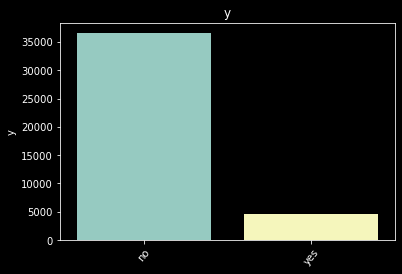

In [14]:
for i in data_cat.columns:
    plot = sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.xticks(rotation=50)
    plt.show()

## Zmienna zależna o wiele cześciej przyjmuje "nie" niż "tak"

## Zależność zmiennej zależnej od innych zmiennych kategorycznych

In [16]:
for i in categorical:
    display(pd.pivot_table(data, index = "y", columns = i ,values="age", aggfunc ='count').transpose())

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


y,no,yes
default,,
no,28391.0,4197.0
unknown,8154.0,443.0
yes,3.0,NaN


y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


ValueError: Grouper for 'y' not 1-dimensional

## Wnioski
-  dzień tygodnia nie wydaje się mieć dużego sensu jeśli chodzi o analizę danych
-  dziwne jest to, że w miesiącach o małej liczbie danych skuteczność przekonania klienta jest o wiele większa niż w miesiącach o większej liczbie klientów
-  emeryci mają najlepszy stosunek odpowiedzi "tak" do wszystkich odpowiedzi

In [ ]:
for i in numerical:
    display(pd.pivot_table(data, index = "y" ,values=i, aggfunc =['mean', 'median']))

### Z jaką ilością ludzi był kontakt w poprzedniej kampanii? (pdays =/= 999)

In [23]:
data["was_previously_contacted"] = data["pdays"].apply(lambda x: 0 if x == 999 else 1)

In [24]:
pd.pivot_table(data, index = "y", columns = "was_previously_contacted" ,values="age", aggfunc ='count')

was_previously_contacted,0,1
y,,
no,36000,548
yes,3673,967


### Widać, że ludzie, z którymi był wcześniej kontant, chętniej zwracali "tak"